In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [132]:
df_fama = pd.read_csv(r'C:\Users\krish\Desktop\Subjects\AppliedML\Lec-4\F-F_Research_Data_Factors_daily_CSV\FF3.csv')

In [133]:
df_fama.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [134]:
df_fama = df_fama[df_fama.Date > 20160515]

In [135]:
df_fama.shape

(997, 5)

In [136]:
df_fama.index = range(0, 997, 1)

In [137]:
df_jpm = pd.read_csv(r'C:\Users\krish\Desktop\Subjects\AppliedML\Lec-4\JPM.csv')
df_jpm = df_jpm[df_jpm.Date <= '2020-04-30']

In [138]:
df_jpm.shape

(997, 7)

In [139]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000


In [140]:
df_jpm['MktRF'] = df_fama['Mkt-RF']

In [141]:
#df_jpm['MktRF'] = df_fama['Mkt-RF']
df_jpm['SMB'] = df_fama['SMB']
df_jpm['HML'] = df_fama['HML']
df_jpm['RF'] = df_fama['RF']

In [142]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,0.99,0.28,-0.24,0.001
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.95,-0.78,0.61,0.001
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001


In [143]:
df_jpm['stock_return'] = df_jpm['Adj Close'].pct_change()

In [144]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,stock_return
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,0.99,0.28,-0.24,0.001,NaN
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.95,-0.78,0.61,0.001,0.000000
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,0.001893


In [145]:
df_jpm = df_jpm[df_jpm['stock_return'].notna()]

In [146]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,stock_return
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.95,-0.78,0.61,0.001,0.000000
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,0.001893
5,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.18,0.26,-0.32,0.001,-0.000787


In [147]:
df_jpm = df_jpm[df_jpm.stock_return != 0]

In [148]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,stock_return
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,0.001893
5,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.18,0.26,-0.32,0.001,-0.000787
6,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,1.43,0.68,-0.34,0.001,0.017019


In [149]:
T = df_jpm.shape[0]
T

988

In [150]:
columns = ['MktRF','SMB','HML']
X=df_jpm[columns]

In [151]:
X.head()

,MktRF,SMB,HML
2,0.10,0.10,0.83
3,-0.33,-0.32,-0.30
4,0.75,0.90,-0.30
5,-0.18,0.26,-0.32
6,1.43,0.68,-0.34


In [152]:
X = np.column_stack([np.ones((len(X),1)),X])
X.shape

(988, 4)

In [153]:
X

array([[ 1.  ,  0.1 ,  0.1 ,  0.83],
       [ 1.  , -0.33, -0.32, -0.3 ],
       [ 1.  ,  0.75,  0.9 , -0.3 ],
       ...,
       [ 1.  , -0.44,  0.87,  2.89],
       [ 1.  ,  2.92,  1.87,  2.04],
       [ 1.  , -1.18, -1.42, -1.63]])

In [154]:
Y = df_jpm['stock_return'].values
Y.shape

(988,)

In [155]:
Y

array([ 3.85988034e-02, -1.01498333e-02,  1.89298255e-03, -7.87240718e-04,
        1.70186862e-02,  1.51844739e-02, -7.47884813e-03,  6.15121862e-03,
       -2.44561960e-03,  6.43484452e-03,  1.82670380e-03, -1.77784148e-02,
        9.90101532e-03, -3.37008777e-03,  2.92031670e-03, -7.66269996e-03,
       -1.40539794e-02, -8.92861858e-03, -1.88081815e-02, -1.77209089e-03,
        4.03429218e-03,  9.64325293e-04,  1.44502246e-03,  9.29943464e-03,
       -3.81256984e-03,  2.13681140e-02, -6.94769502e-02, -3.33892597e-02,
        3.31539243e-02,  2.82258842e-02,  1.53593091e-02, -6.48721258e-03,
       -2.79136515e-02,  1.07473742e-02,  6.47934141e-03,  2.06338255e-02,
        7.11637450e-03,  1.49349451e-02, -6.32832832e-04,  1.51994357e-02,
        9.35802649e-04, -3.42800488e-03, -1.56338748e-03,  1.09602914e-03,
       -3.75416200e-03,  5.49555947e-03, -2.65450426e-03,  4.07043697e-03,
        3.11879869e-03, -3.57521681e-03, -2.02814145e-03, -2.65747868e-03,
       -2.35110155e-03,  

In [157]:
Y=np.asarray(Y)
Y = Y.reshape(988,1)

In [158]:
'OLS REGRESSION STARTS'
'Linear Regression of Y: T x 1 on'
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)
invXX

array([[ 1.01865794e-03, -4.05371944e-05,  2.28666476e-05,
         1.03758967e-04],
       [-4.05371944e-05,  6.79019545e-04, -1.25120894e-04,
        -2.01583667e-04],
       [ 2.28666476e-05, -1.25120894e-04,  3.09450515e-03,
        -1.88412127e-04],
       [ 1.03758967e-04, -2.01583667e-04, -1.88412127e-04,
         2.22390331e-03]])

In [159]:
invXX.shape

(4, 4)

In [160]:
'OLS estimates for coefficients: X x 1'
beta_hat = invXX@X.transpose()@Y
beta_hat

array([[ 0.00067831],
       [ 0.01121691],
       [-0.00184536],
       [ 0.01094796]])

In [161]:
'Predictive value of Y using OLS'
y_hat = X@beta_hat
y_hat.shape

(988, 1)

In [162]:
'Residuals from OLS'
residuals = Y - y_hat
residuals.shape

(988, 1)

In [163]:
'Variance of residuals'
variance = (1/T)*residuals.transpose()@residuals
variance

array([[5.20195095e-05]])

In [164]:
'standard deviation of Y or residuals'
standard_deviation = np.sqrt(variance)

In [165]:
'variance-covariance matrix of beta_hat'
varcov_beta_hat = (variance)*invXX
std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))


In [166]:
N = X.shape

In [167]:

'Calculate R-square'
R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
print(R_square)
print(adj_R_square)


[[0.84512614]]
[[0.84465396]]


In [168]:
'Test Each Coefficient: beta_i'
'Null Hypothesis: beta_i = 0'
t_stat = (beta_hat.transpose()-0)/std_beta_hat
p_val_t = 1-ss.norm.cdf(t_stat)


In [169]:
'Test of Joint Significance of Model'
F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
         (residuals.transpose()@residuals/(T-N[1]))

p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])

p_val_F

array([[1.11022302e-16]])

In [170]:
def print_all_values():
    print('Variance-------------',variance)
    print('Standard Deviation---',standard_deviation)
    print('R Square-------------',R_square)
    print('Adjusted R Square----',adj_R_square)
    print('P values-------------',p_val_t,p_val_F)
    plt.plot(y_hat, color='green')
    plt.plot(Y, color = 'red')
    plt.show()


Variance------------- [[5.20195095e-05]]
Standard Deviation--- [[0.00721246]]
R Square------------- [[0.84512614]]
Adjusted R Square---- [[0.84465396]]
P values------------- [[0.46265523 0.02879789 0.55816837 0.15291001]] [[1.11022302e-16]]


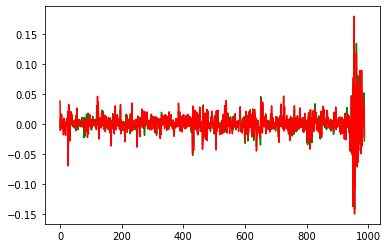

In [171]:
print_all_values()

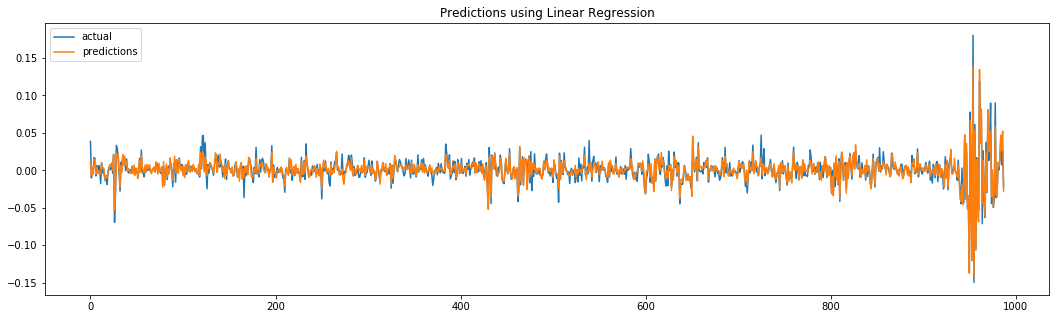

In [172]:
pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
plot_df.plot(figsize=(18, 5), title='Predictions using Linear Regression')

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
mse = mean_squared_error(Y, y_hat)
rmse = np.sqrt(mse)

In [ ]:
rmse